In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

Omega0_b = 0.02238280
Omega0_cdm = 0.3
Omega0_g = 4.6e-5
Omega0_lambda = 0.67
Omega0_ur = 0.001
H0 = 70*1000/299792458

In [30]:
def H(x, rho):
    return rho[0] + rho[1] + (H0**2)*(Omega0_b*np.exp(-3*x) + (Omega0_g + Omega0_ur)*np.exp(-4*x) + Omega0_lambda)

def f(x, rho, gamma, atr):
    if (x >= np.log(atr)):
        return (-3*rho[0], -4*rho[1])
    else:
        drhochi = -3*rho[0] - rho[0]*gamma/H(x, rho)
        drhocft = -4*rho[1] + rho[0]*gamma/H(x, rho)
        return (drhochi, drhocft)

In [37]:
N = 10
f_table = np.logspace(-3,1,N, dtype=np.float64)
atr_table = np.logspace(-9, 0, N, dtype=np.float64)
tau_table = np.logspace(1, 10, N, dtype=np.float64)
a_table = np.log(np.logspace(-10, 0, 1000, dtype=np.float64))

/var/folders/hb/f8g3yv1s0xgcyvrf_6rd_qnc0000gn/T/ipykernel_4402/3723201098.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


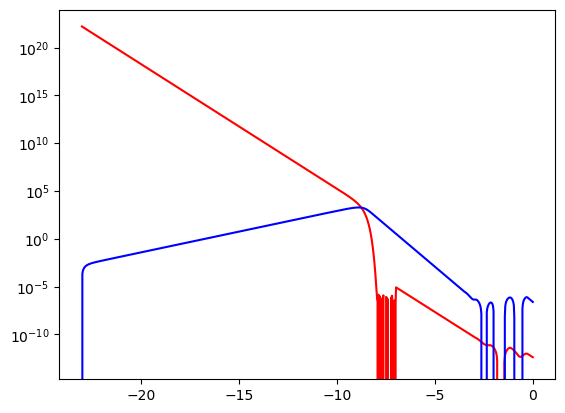

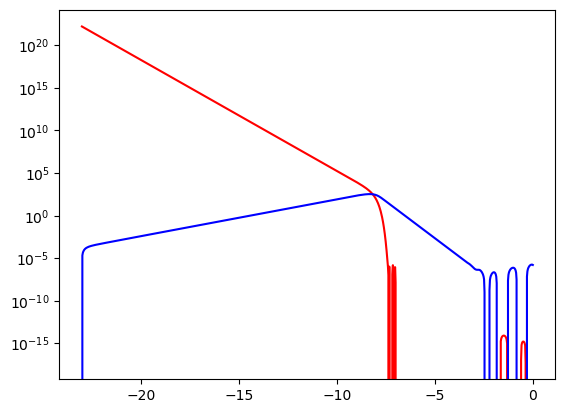

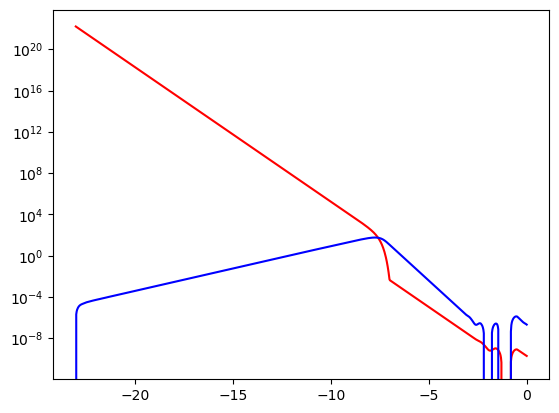

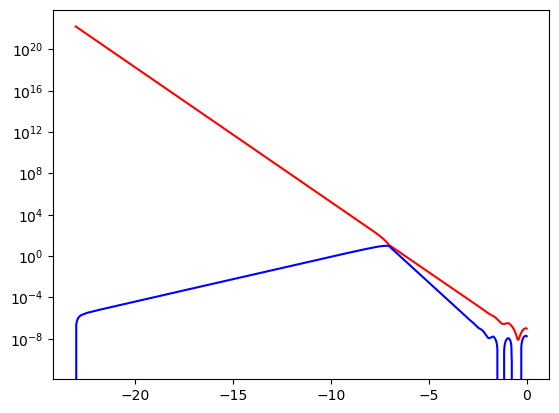

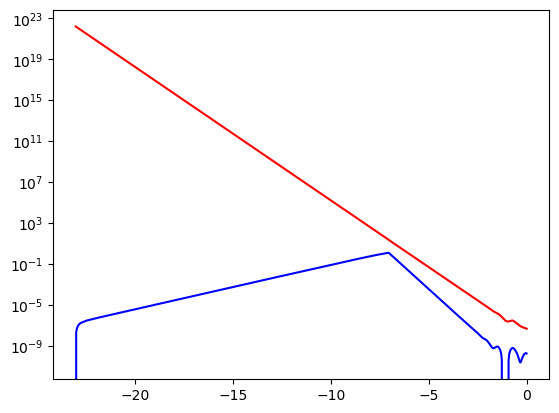

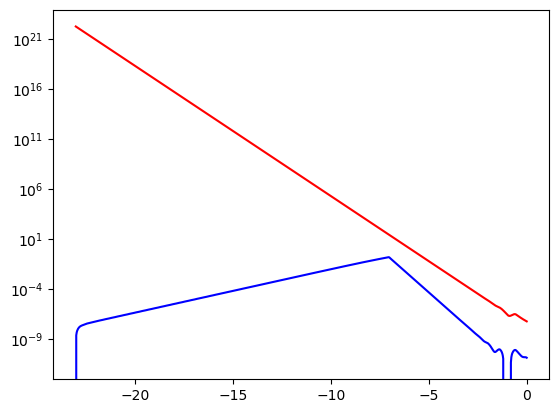

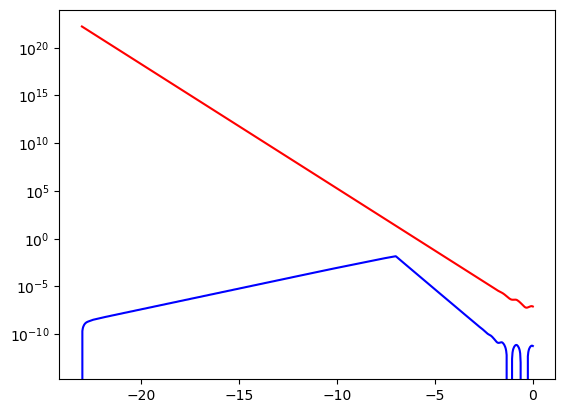

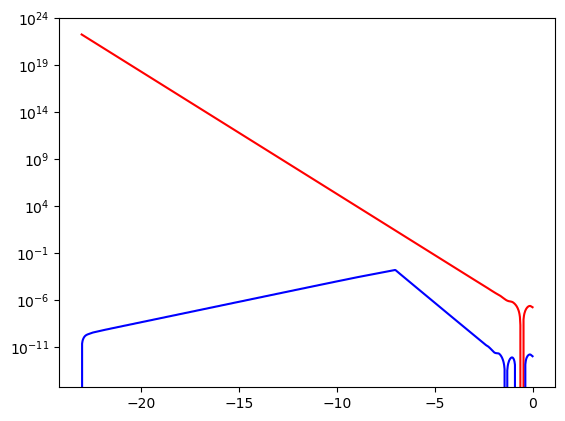

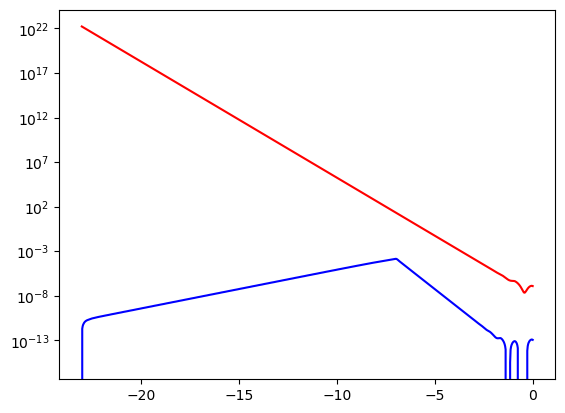

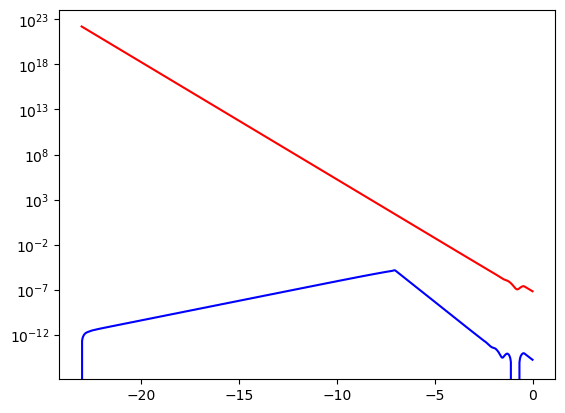

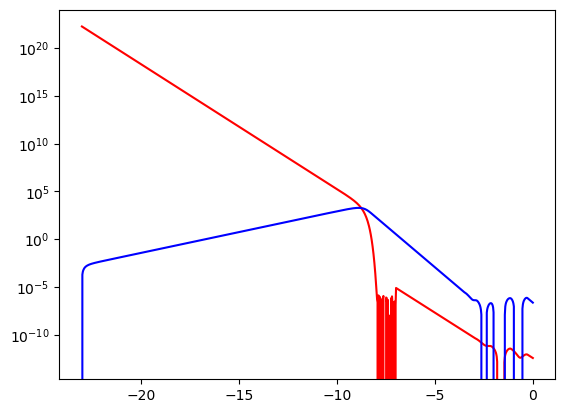

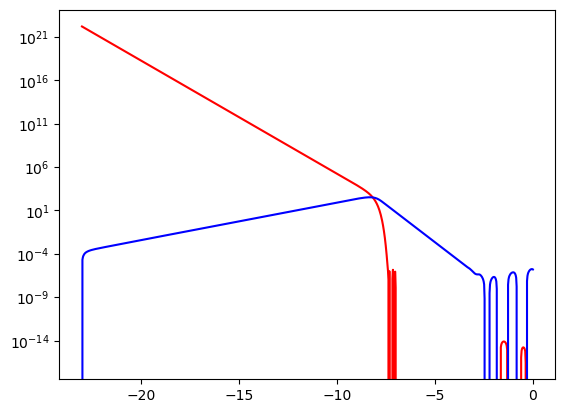

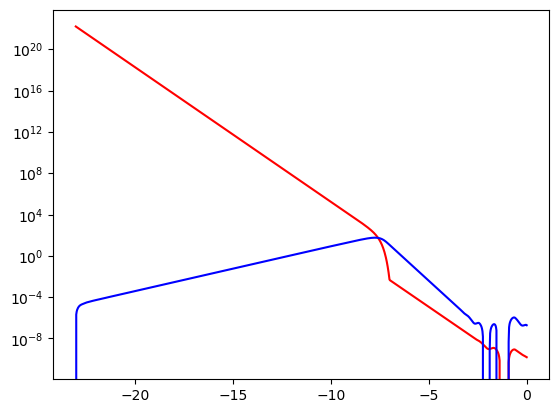

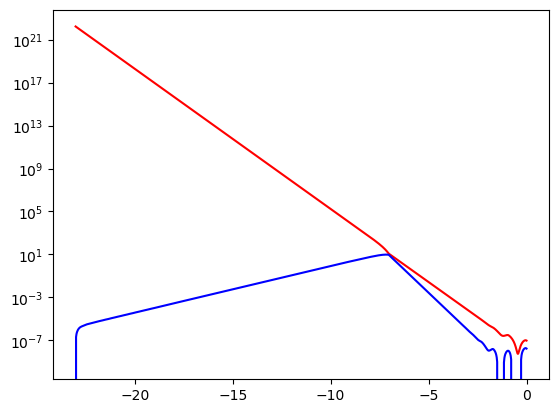

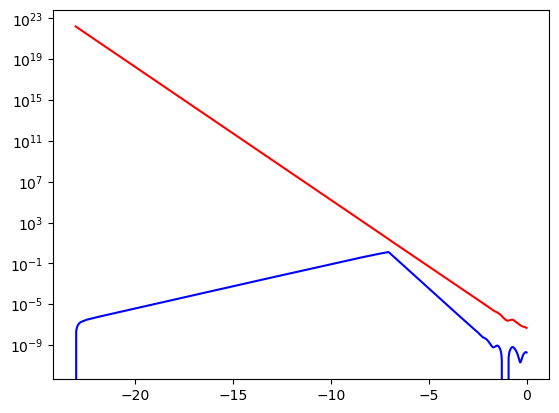

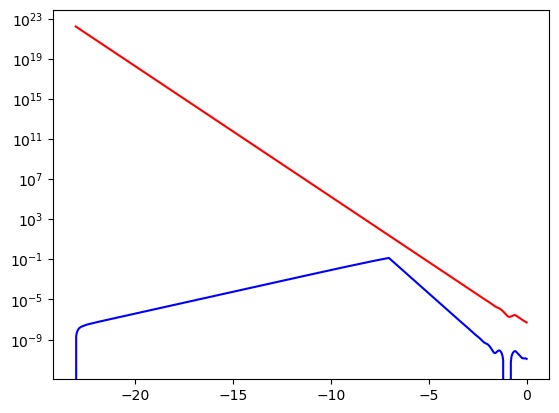

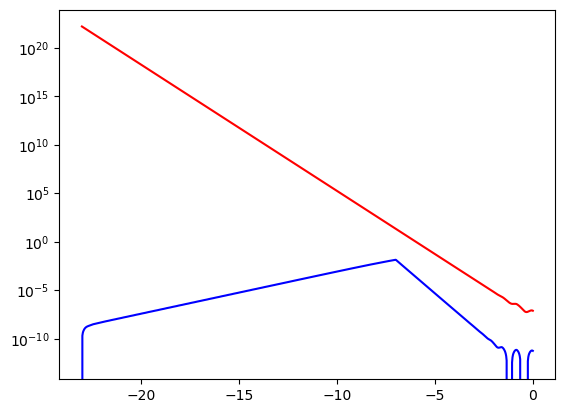

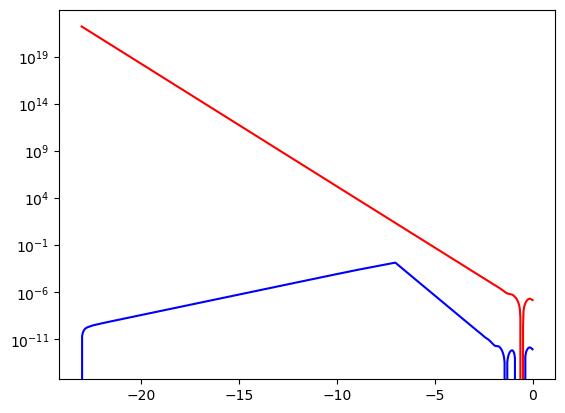

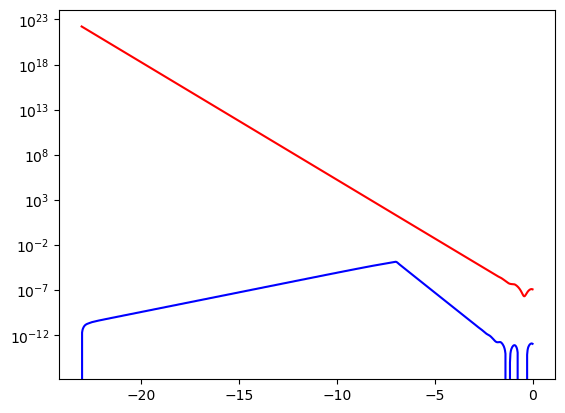

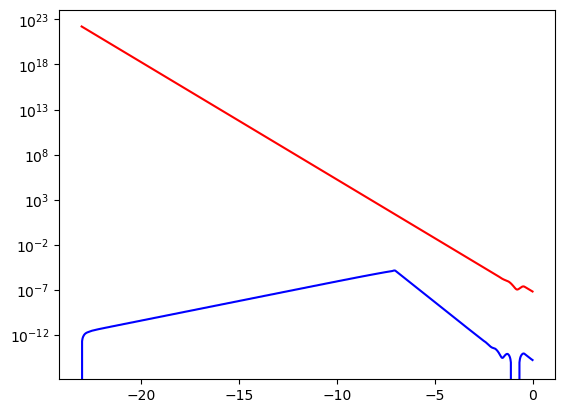

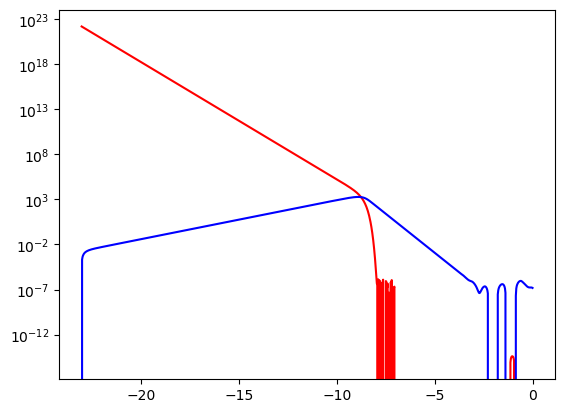

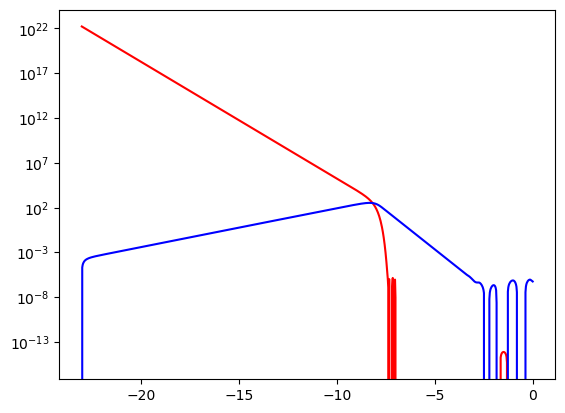

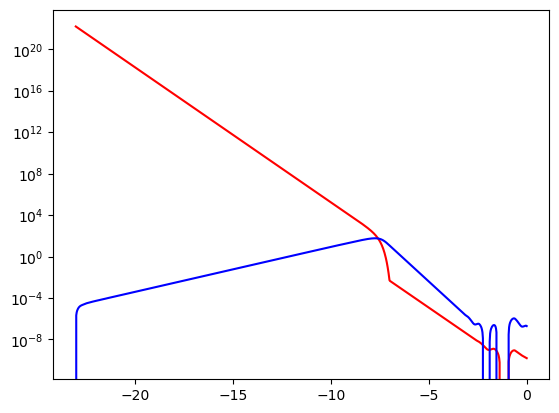

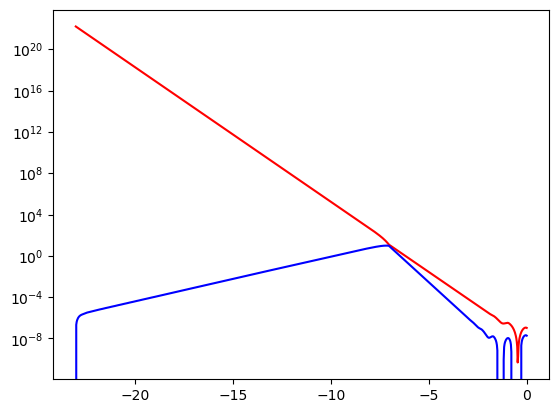

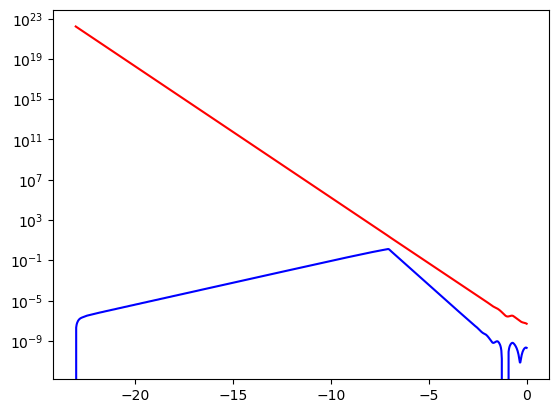

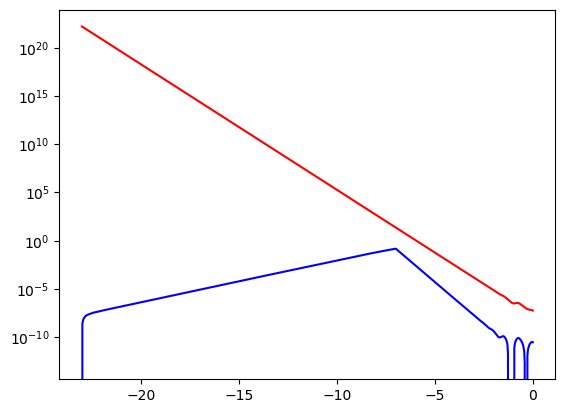

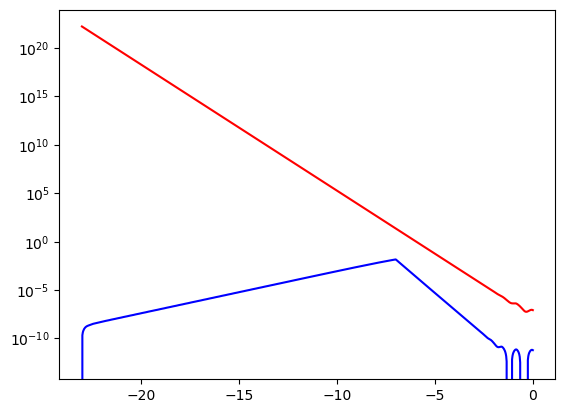

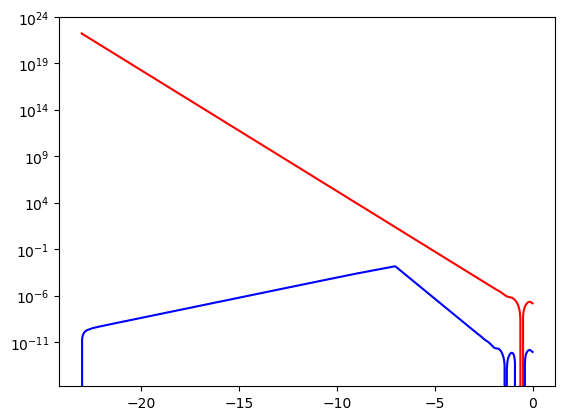

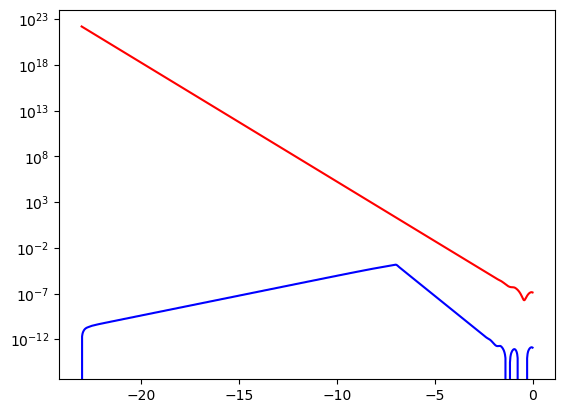

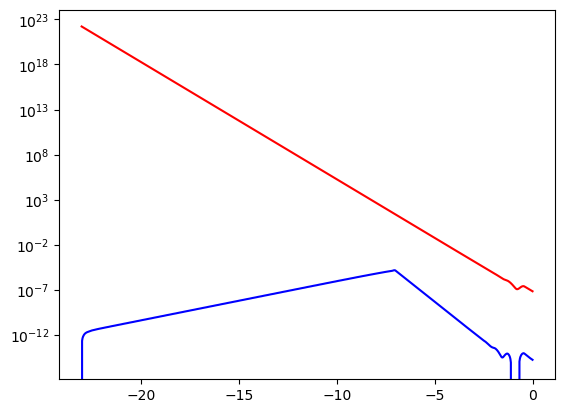

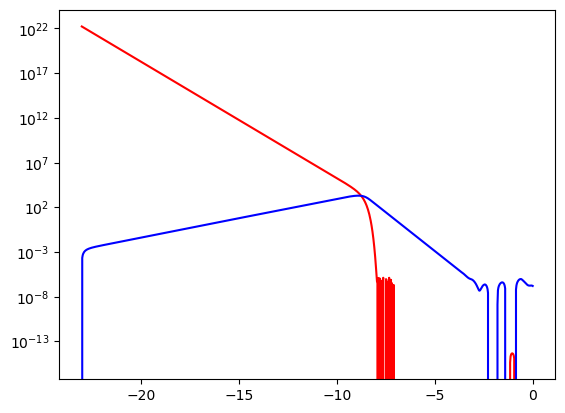

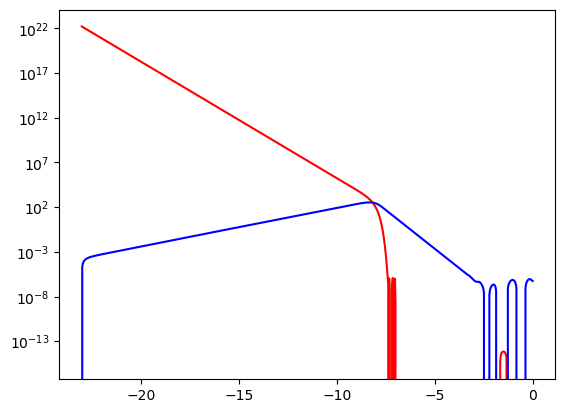

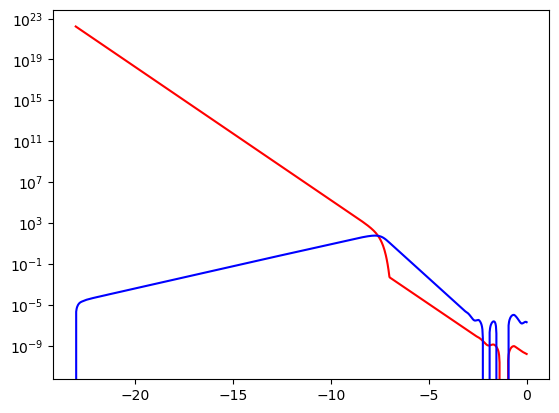

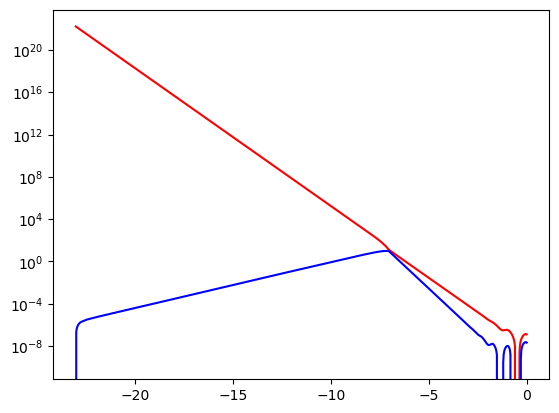

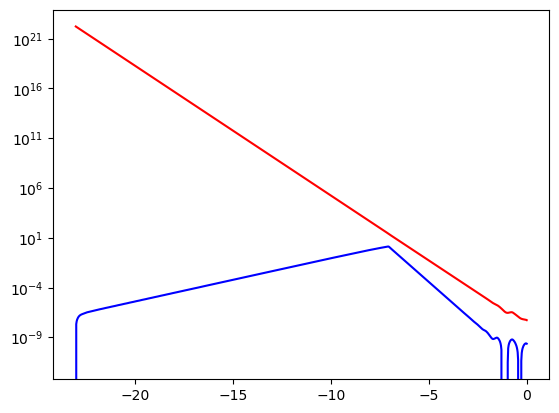

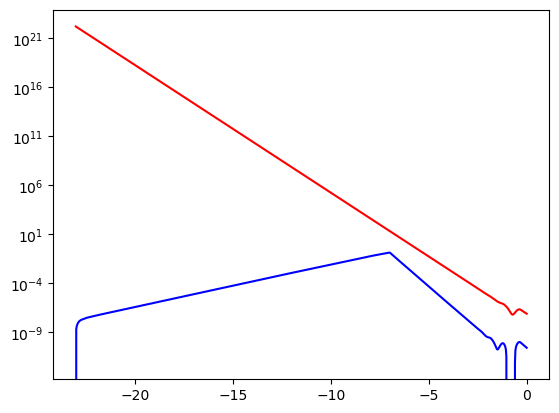

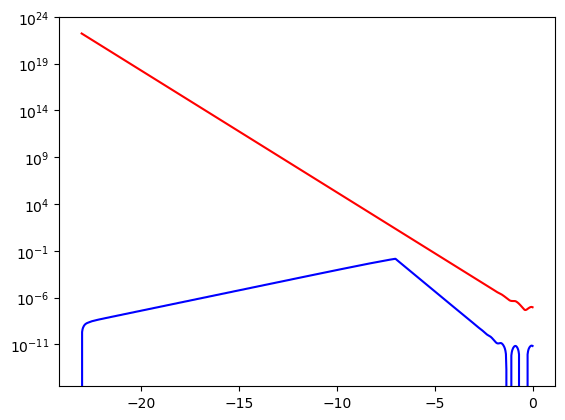

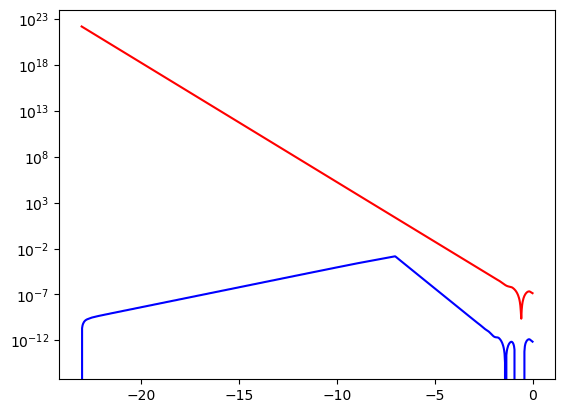

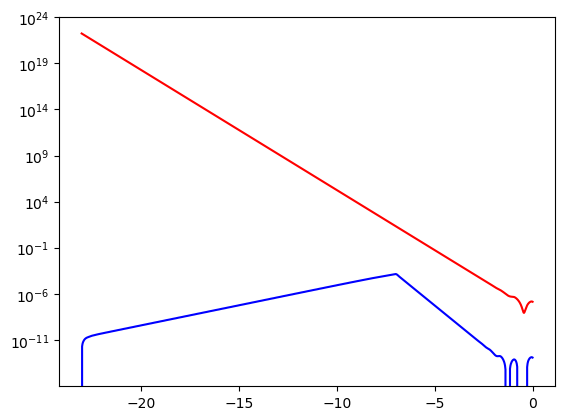

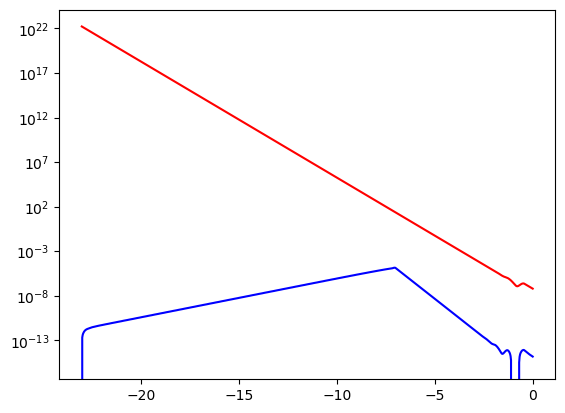

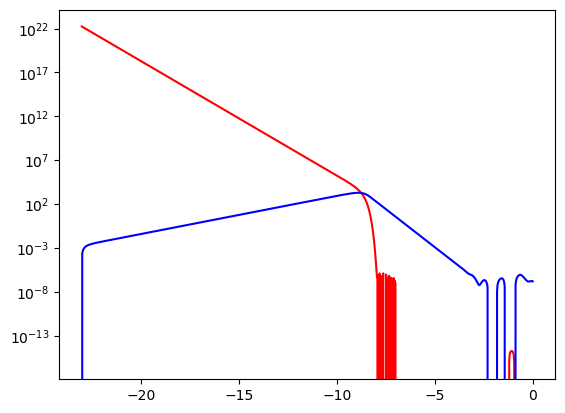

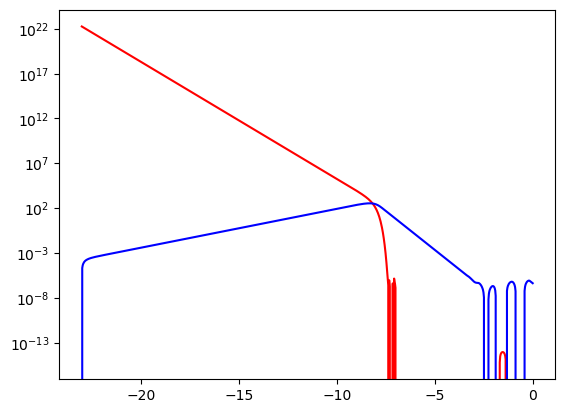

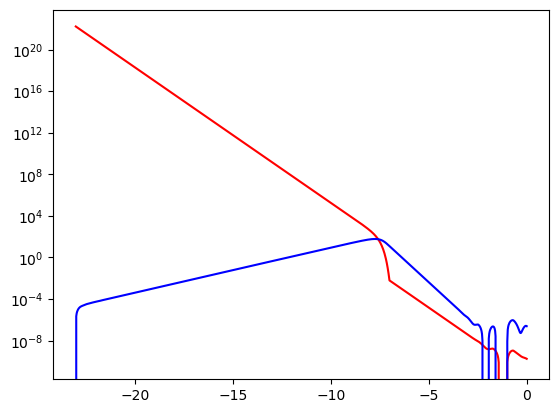

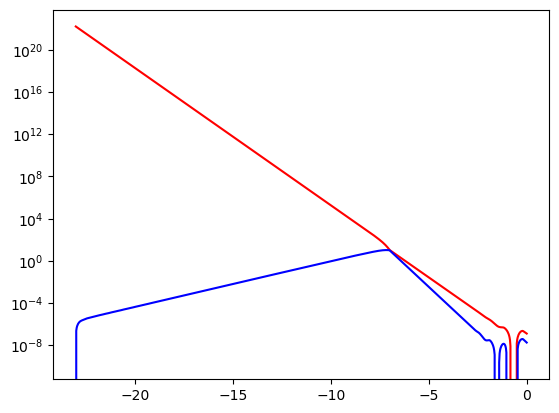

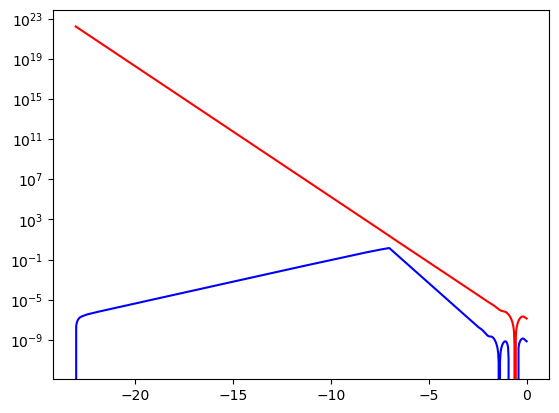

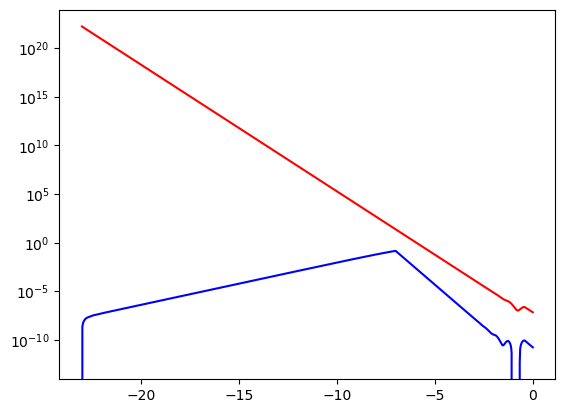

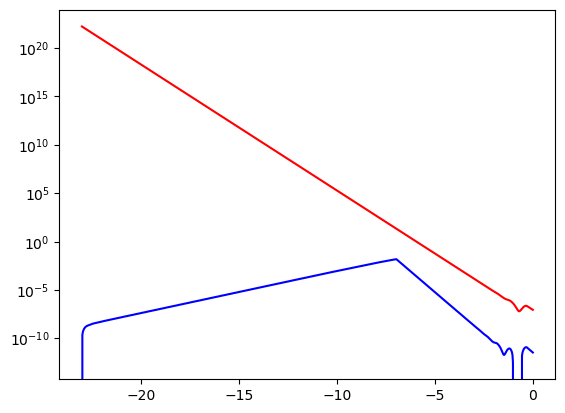

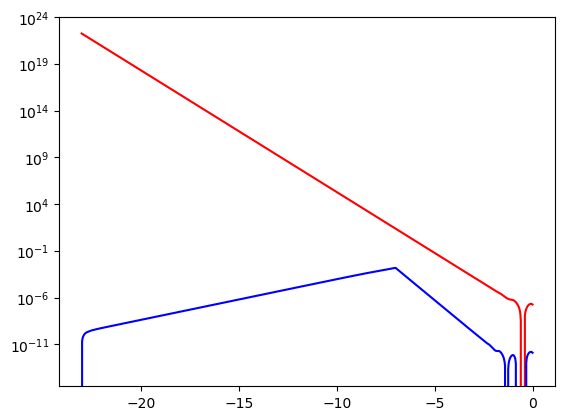

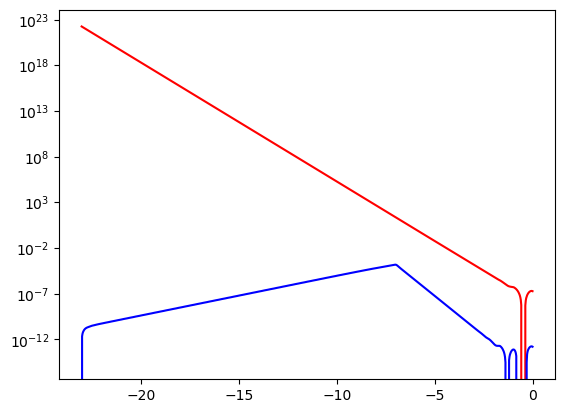

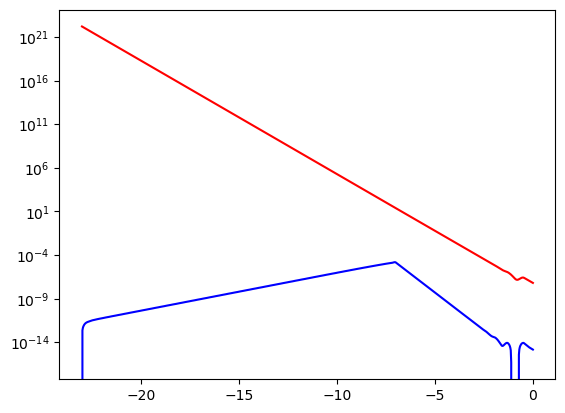

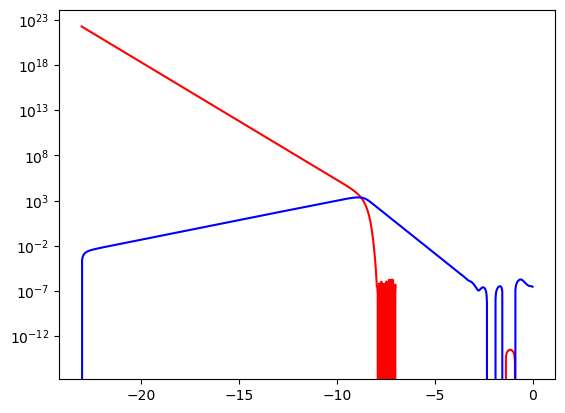

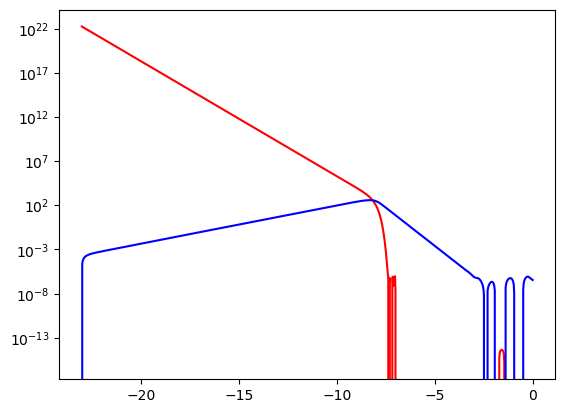

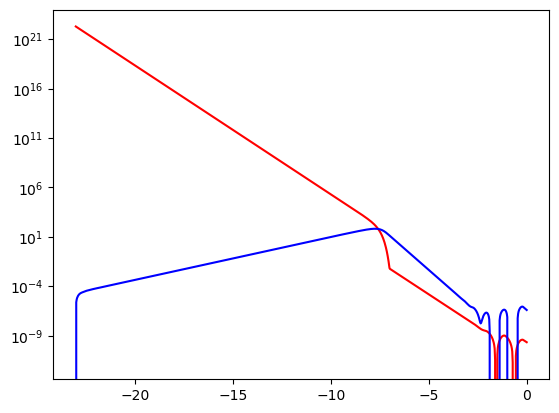

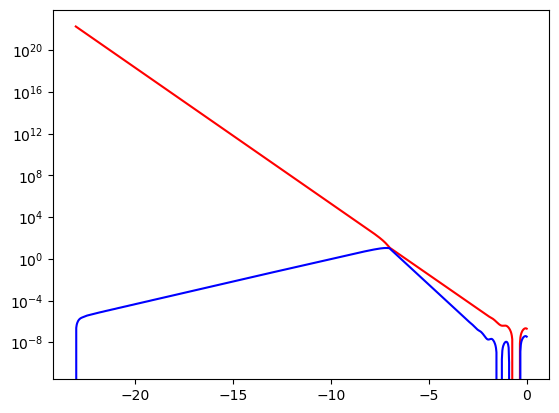

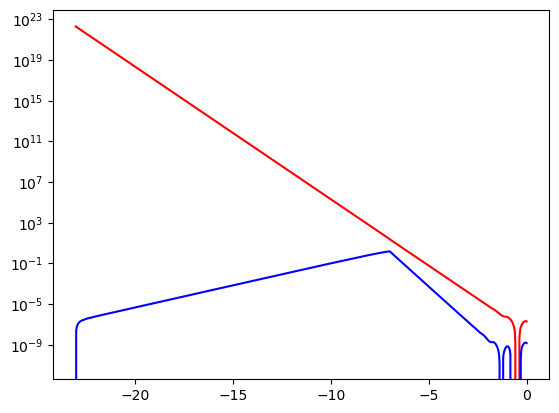

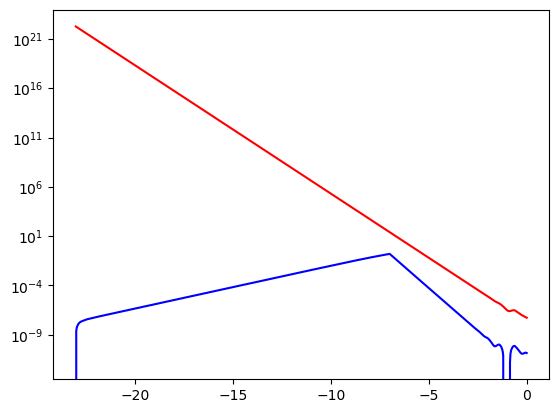

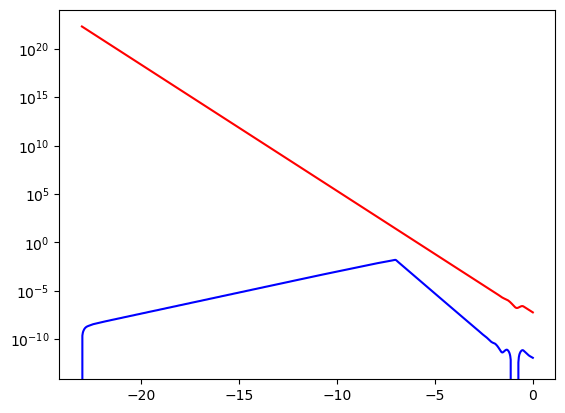

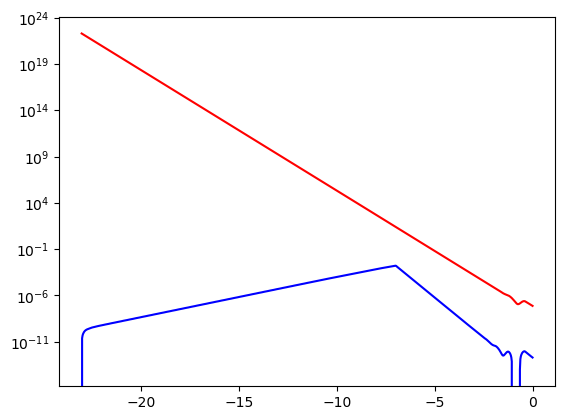

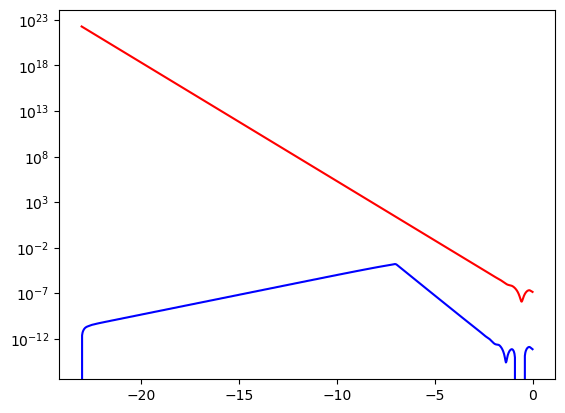

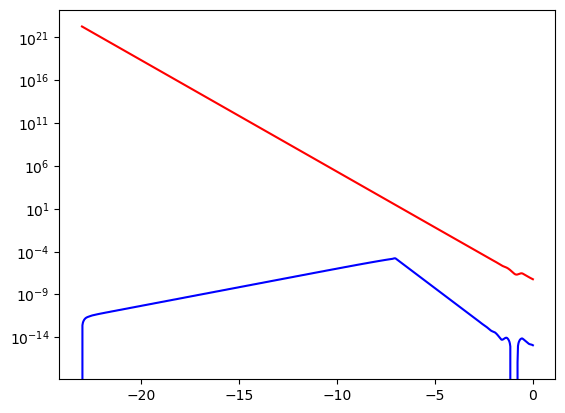

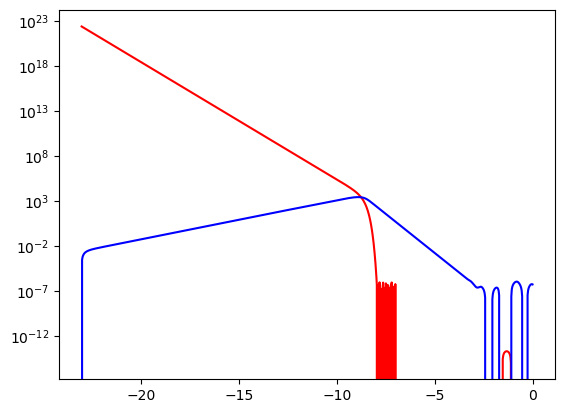

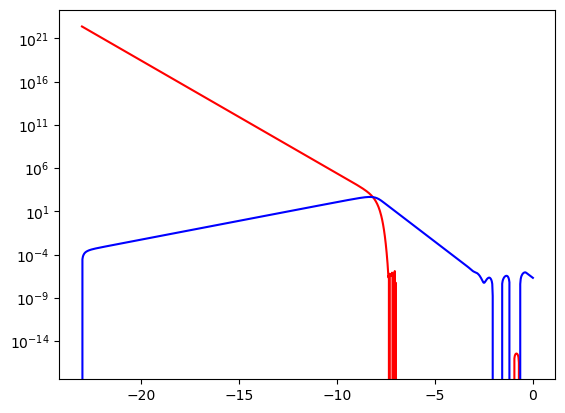

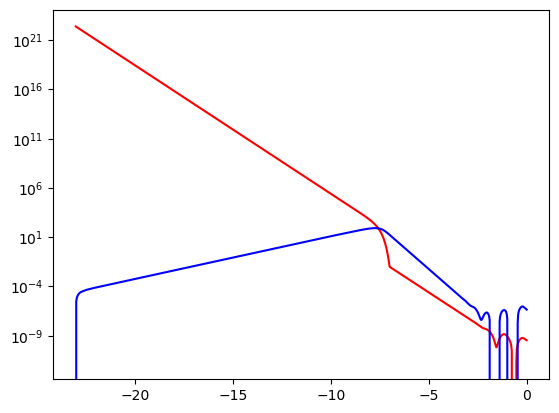

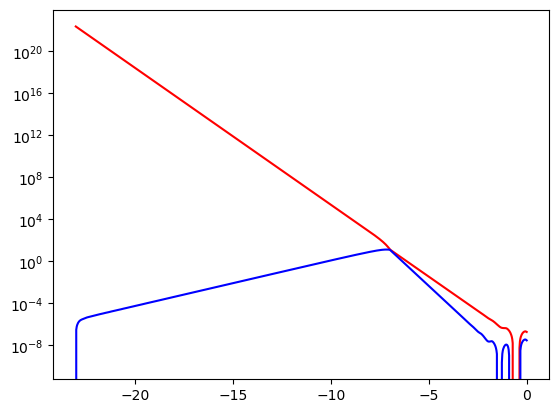

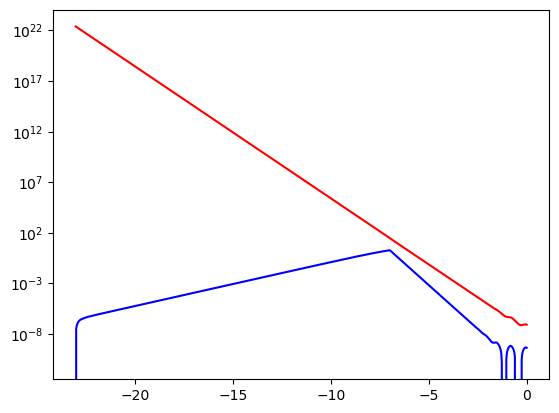

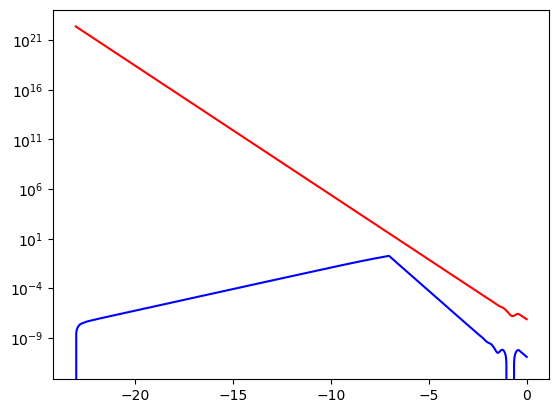

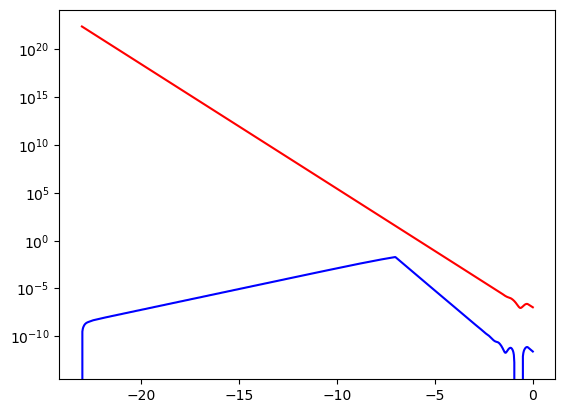

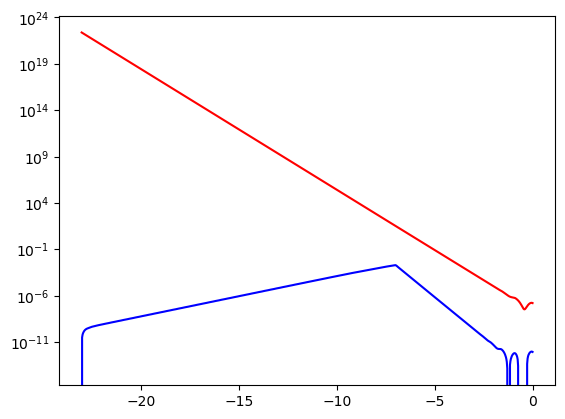

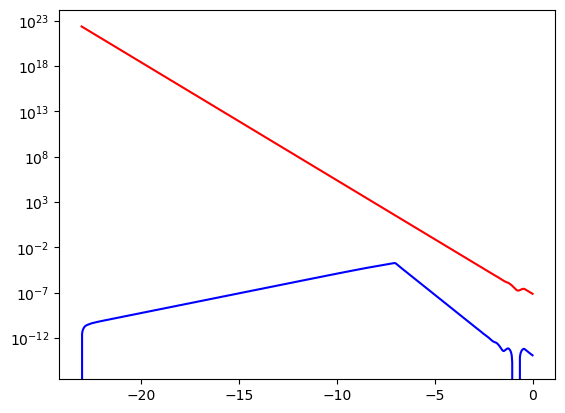

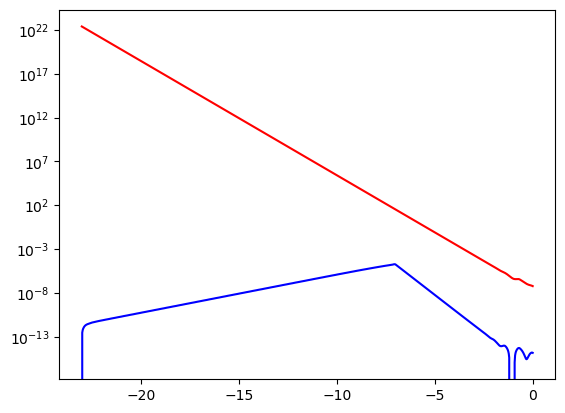

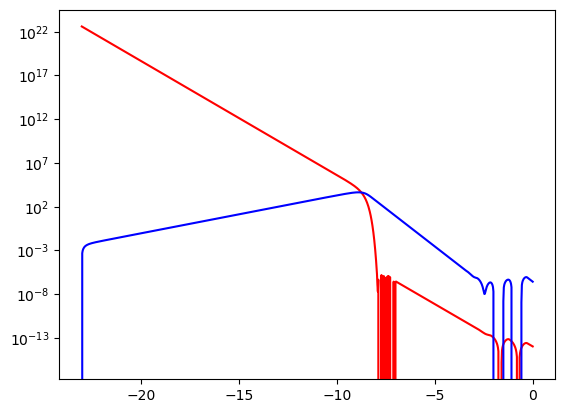

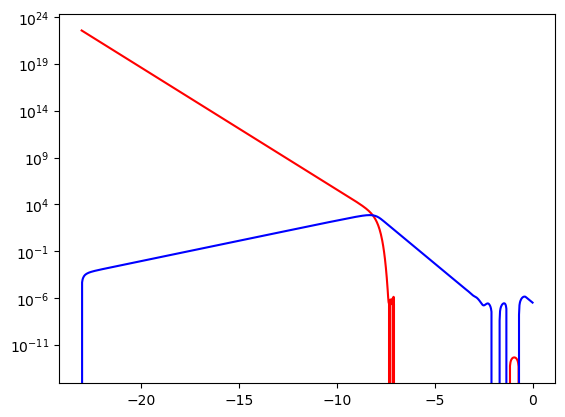

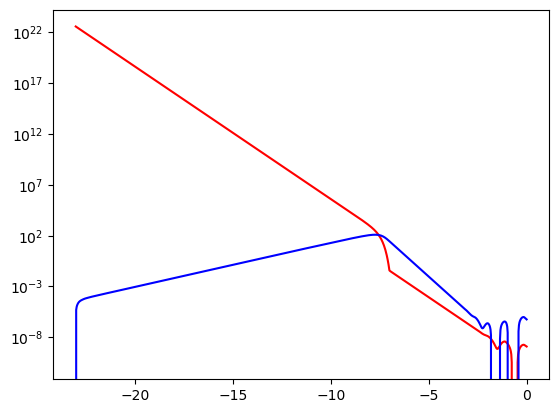

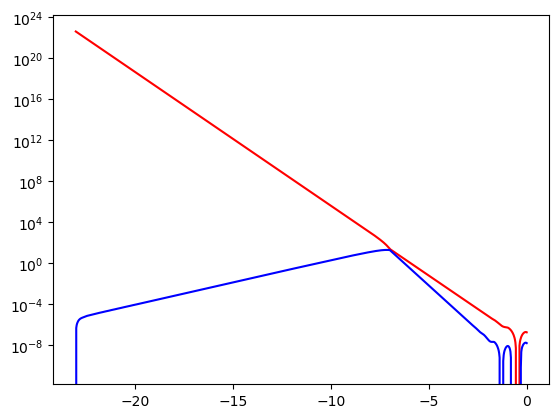

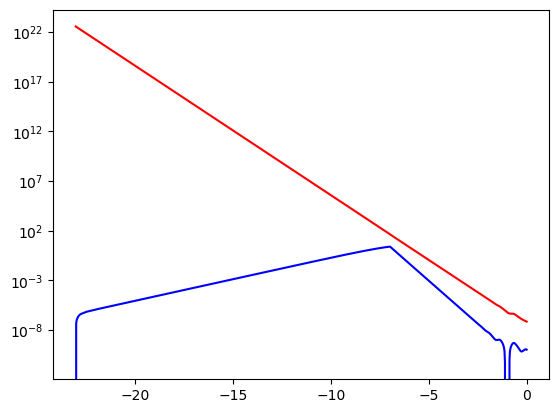

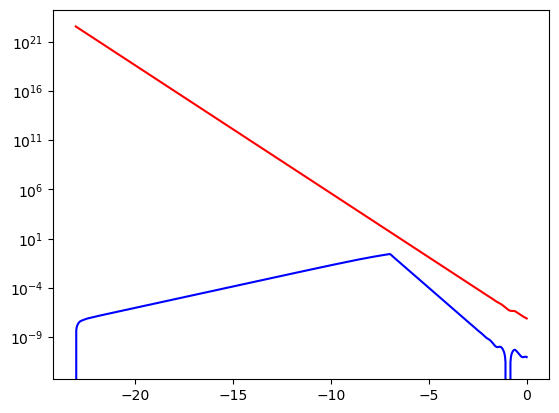

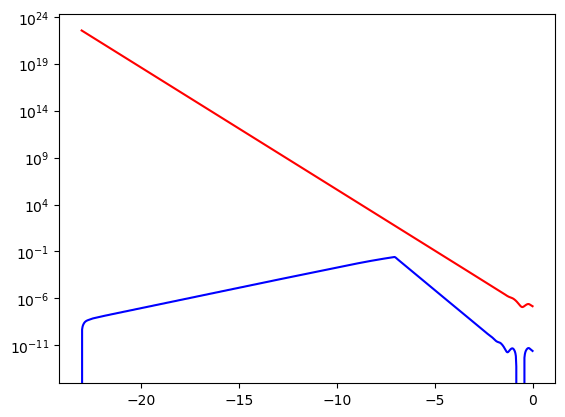

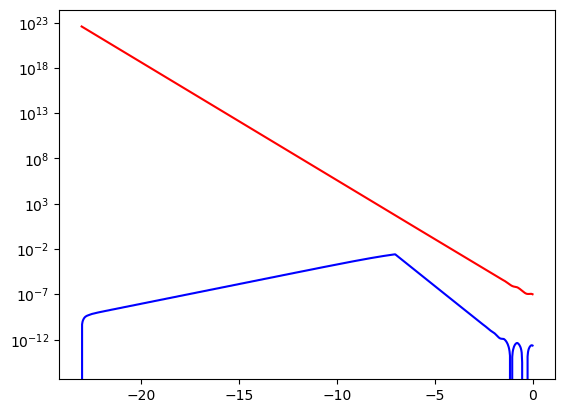

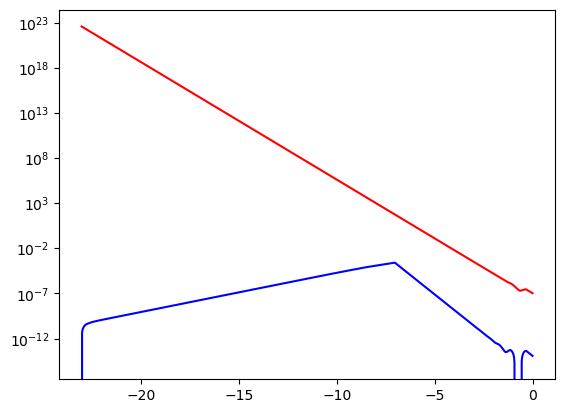

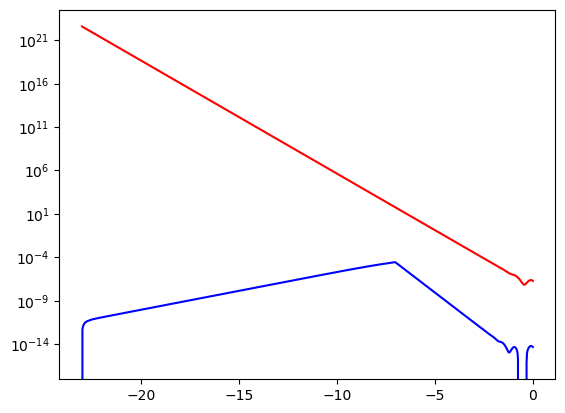

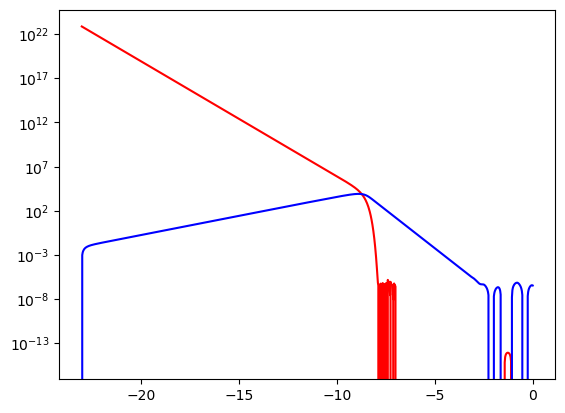

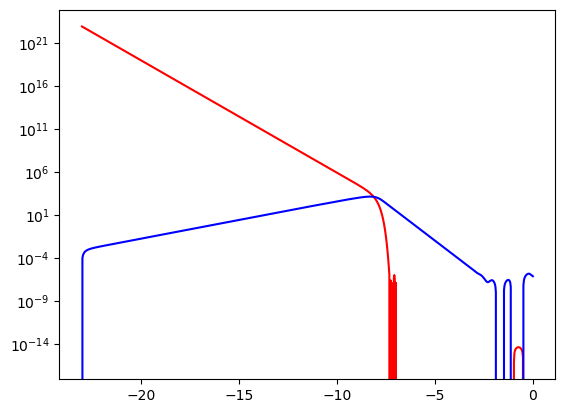

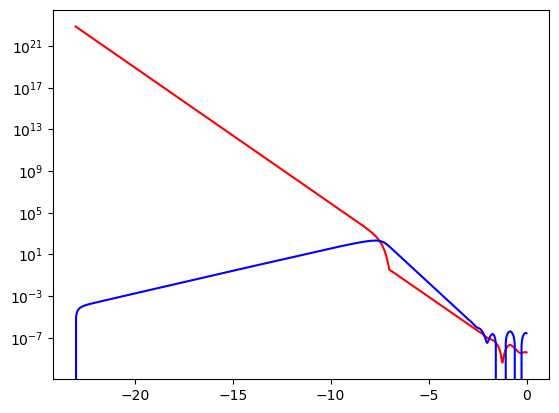

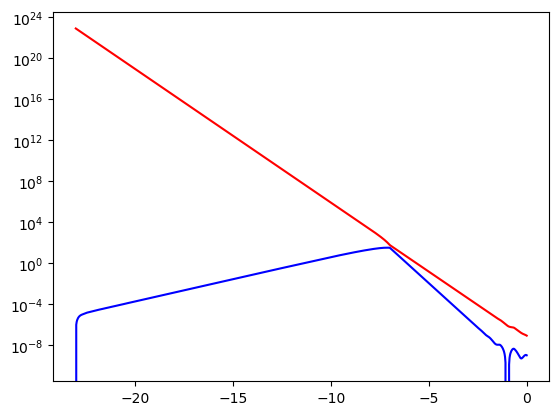

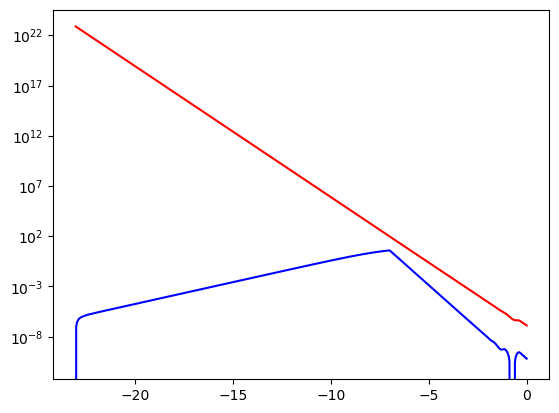

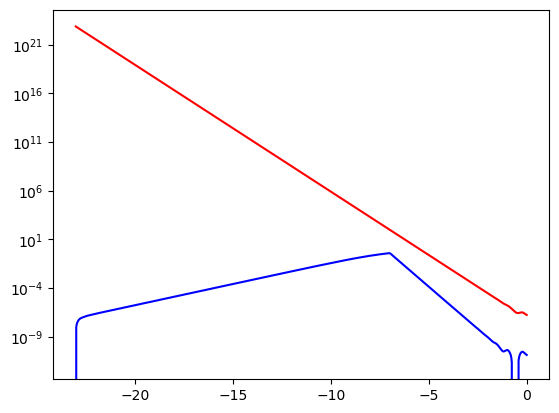

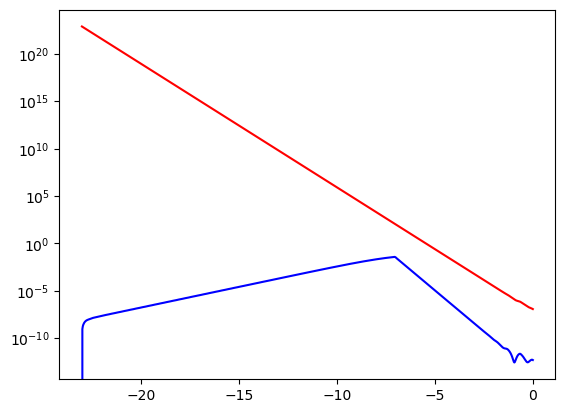

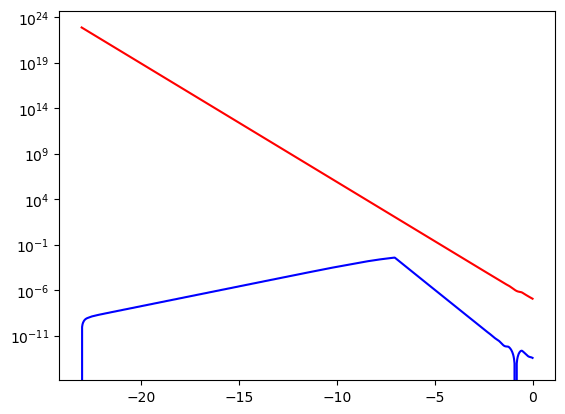

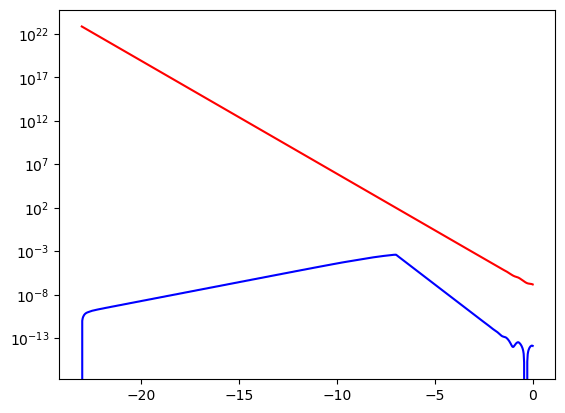

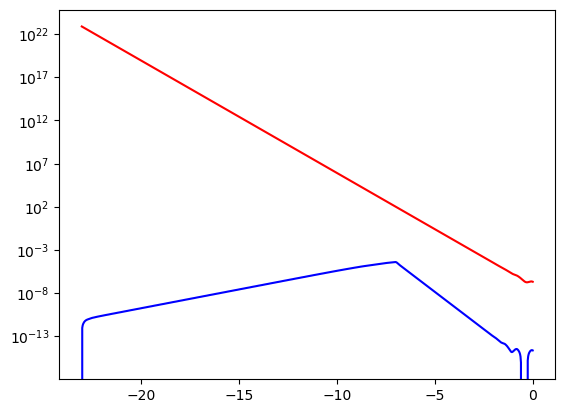

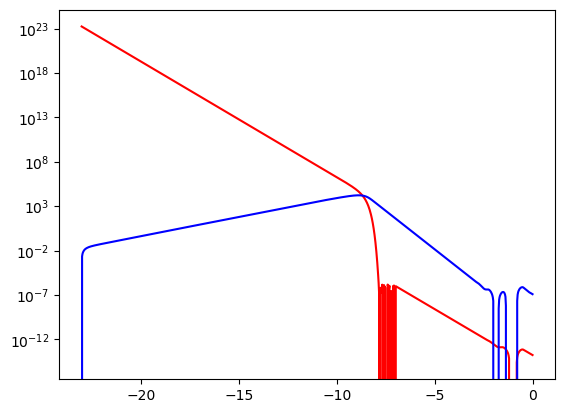

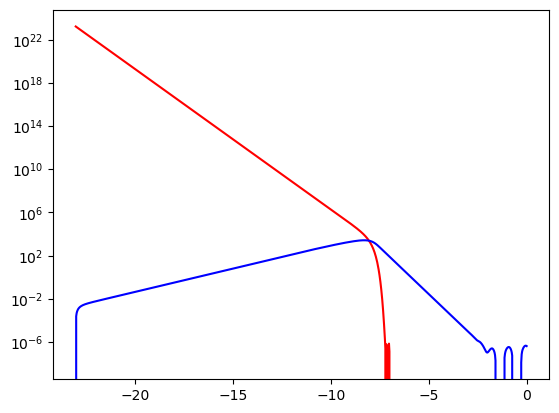

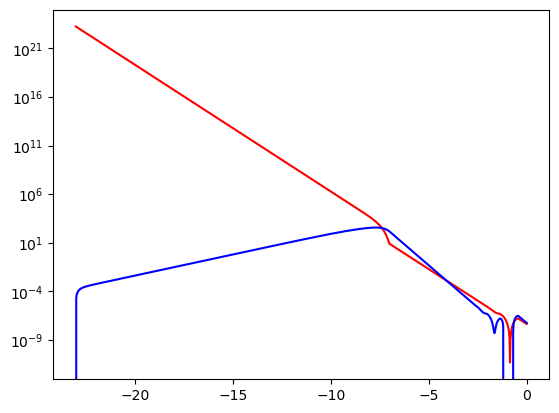

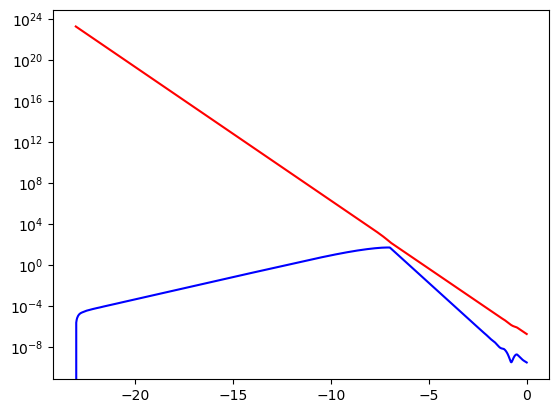

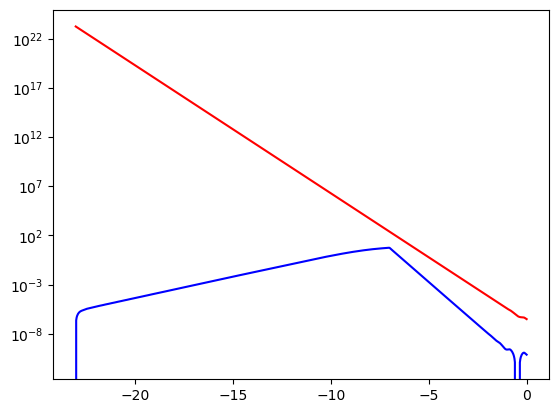

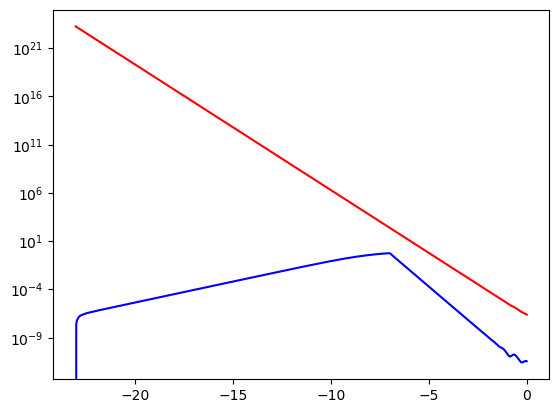

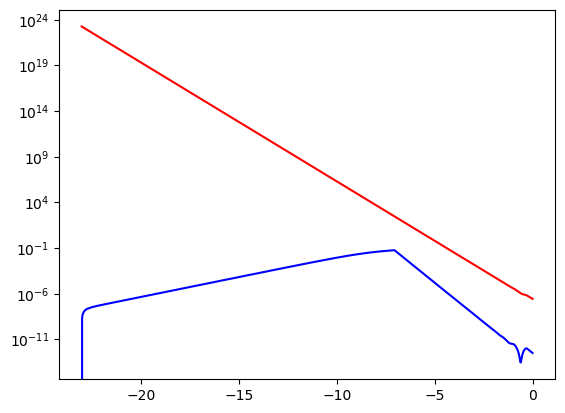

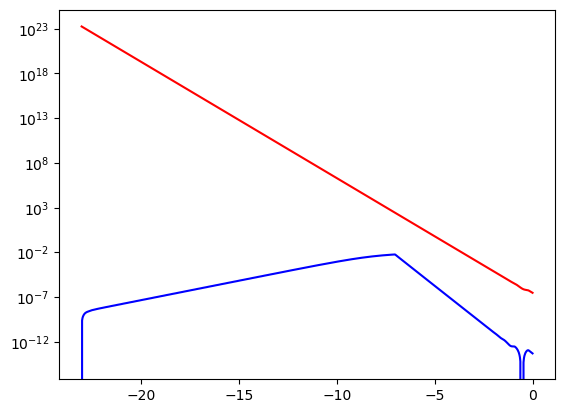

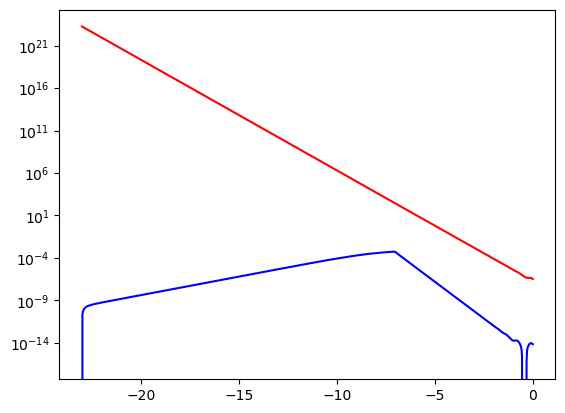

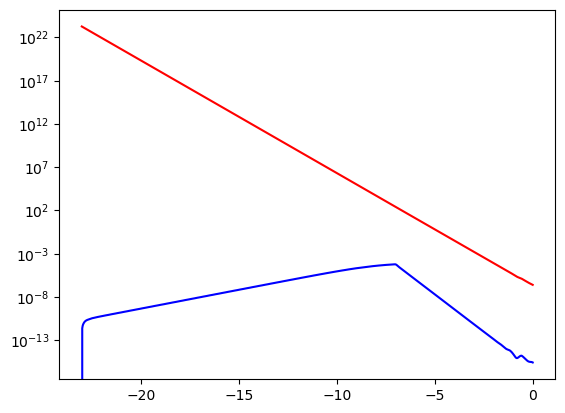

In [38]:
for x in f_table:
    for y in tau_table:
        rhochiinit = (H0**2)*Omega0_cdm*np.pow(1e-10, -3)*(1+x)
        gamma = 1/(y * 3.07e-7)
        sol = scipy.integrate.solve_ivp(f, (np.log(1e-10), 0), (rhochiinit, 0), dense_output=True, args=(gamma, 1/1101))
        fig, ax = plt.subplots()
        ax.plot(a_table, sol.sol(a_table)[0], 'r-')
        ax.plot(a_table, sol.sol(a_table)[1], 'b-')
        ax.set_yscale('log')

In [ ]:
np.logspace()

NameError: name 'sol' is not defined

In [12]:
rhochiinit = (H0**2)*Omega0_cdm*np.pow(1e-10, -3)*(1+f_table[5])
gamma = 1/(tau_table[5] * 3.07e-7)
sol = scipy.integrate.solve_ivp(f, [1e-10, 1], [rhochiinit,0], dense_output=True, args=[gamma, 1/(1101)])

TypeError: 'numpy.float64' object is not callable

In [13]:
plt.plot(a_table,sol.sol(a_table)[0], 'r-')
plt.plot(a_table,sol.sol(a_table)[1], 'b-')
plt.xscale('log')
plt.yscale('log')

NameError: name 'sol' is not defined

In [19]:
f_table[0] + f_table[1]

np.float64(0.0037825594022071257)